In [1]:
import requests
import pandas as pd
import io
import DataProcessing

base_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/"
confirmedUrl = "time_series_19-covid-Confirmed.csv"
deathsUrl = "time_series_19-covid-Deaths.csv"
recoveredUrl = "time_series_19-covid-Recovered.csv"

In [2]:
def loadData(url):
    urlData = requests.get(url).content
    return pd.read_csv(io.StringIO(urlData.decode('utf-8')))
confirmedDf = loadData(base_url+confirmedUrl)
deathsDf = loadData(base_url+deathsUrl)
recoveredDf = loadData(base_url+recoveredUrl)

In [3]:
# Pivoting
def Pivot(df):
    # Exclude outside Europe
    df = df[
        (df["Lat"]>40) & (df["Lat"]<55)
        & (df["Long"]>0) & (df["Long"]<27)
    ]
    df = df.set_index(["Province/State", "Country/Region","Lat","Long"])
    df = df.stack().reset_index().rename(
        columns={"level_4":"Date",0:"Value"}
    )
    df["update"] = pd.to_datetime(df["Date"])
    maxDate = df["update"].max()
    df = df[
        (df["update"]>maxDate - pd.Timedelta(days=60))
    ]
    return df[df["Value"]>0][["Country/Region","update","Value"]]

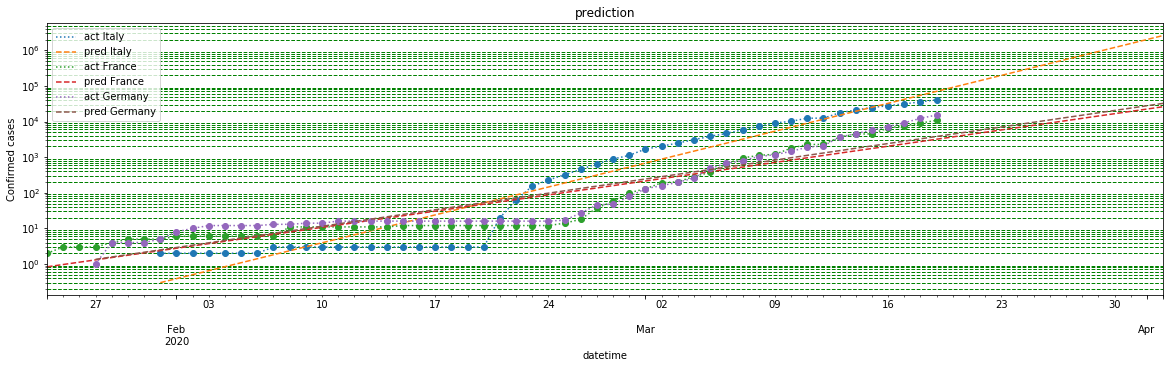

Coefficient of determination: {'Italy': 0.9222807264703116, 'France': 0.8661148723675895, 'Germany': 0.8662169313084236}
Evolution factor per day: {'Italy': 1.8, 'France': 1.4, 'Germany': 1.4}


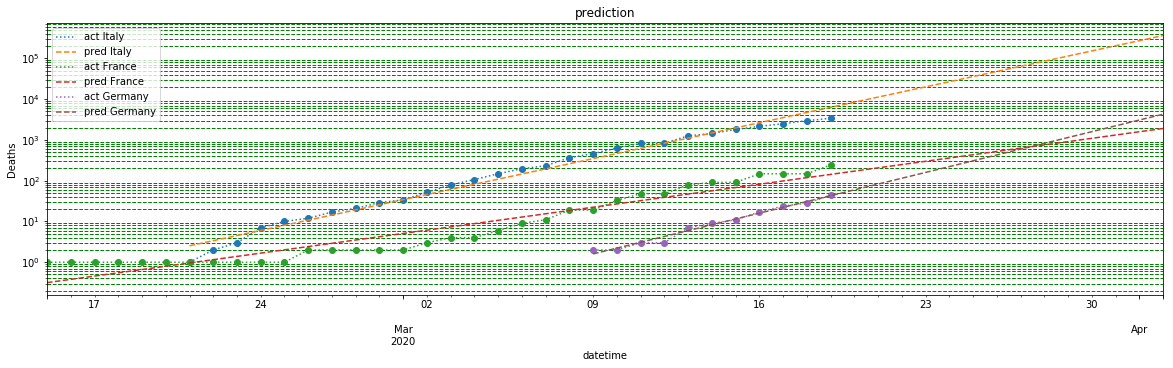

Coefficient of determination: {'Italy': 0.9811153121386618, 'France': 0.9179354835866639, 'Germany': 0.9798574456981199}
Evolution factor per day: {'Italy': 1.9, 'France': 1.5, 'Germany': 2.1}


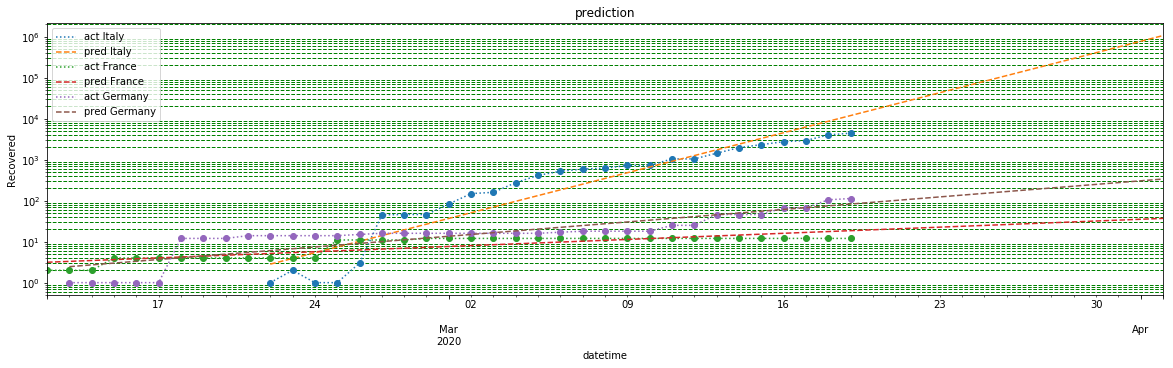

Coefficient of determination: {'Italy': 0.8843332675904559, 'France': 0.7227609273257618, 'Germany': 0.732486255061698}
Evolution factor per day: {'Italy': 2.1, 'France': 1.1, 'Germany': 1.3}


In [4]:
tmpDf = DataProcessing.Analyse.startAnalyse(
    Pivot(confirmedDf),
    ["Italy","France","Germany"],
    "Confirmed cases", 
    "Value"
)
tmpDf = DataProcessing.Analyse.startAnalyse(
    Pivot(deathsDf),
    ["Italy","France","Germany"],
    "Deaths", 
    "Value"
)
tmpDf = DataProcessing.Analyse.startAnalyse(
    Pivot(recoveredDf),
    ["Italy","France","Germany"],
    "Recovered", 
    "Value"
)